In [1]:
import torch,torchvision, numpy
from torch.nn import ReLU, Sequential
import matplotlib.pyplot as plt

In [2]:
    test_data = torchvision.datasets.CIFAR10(
        "datasets",
        download = True,
        transform = torchvision.transforms.ToTensor(),
        train=False
        )

    test_loader = torch.utils.data.DataLoader(
        test_data,
        batch_size = 1,
        shuffle = True,
        num_workers = 4
        )

Files already downloaded and verified


In [3]:
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    network = torchvision.models.resnet18()
    network._modules['fc'] = torch.nn.Linear(in_features=512, out_features=10, bias=True)
    network.load_state_dict(torch.load('saved_model.pth',map_location=torch.device('cpu')))

    from guided_backprop import GetGradient
    GG = GetGradient(network)

conv1
bn1
relu
ReLu
maxpool
layer1
Sequential
layer2
Sequential
layer3
Sequential
layer4
Sequential
avgpool
fc
Registering Hook


tensor([4])
[4]
hej


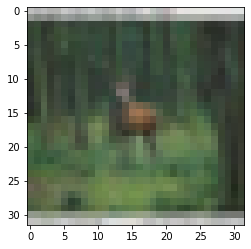

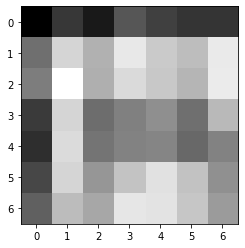

tensor([4])
4


In [15]:
img,label = next(iter(test_loader))
out = network(img)
s_img = numpy.array(numpy.squeeze(img))
gradients = GG.calculate_gradients(img,label)



plt.imshow(numpy.moveaxis(s_img,0, -1))
plt.show()
plt.imshow(gradients[0] + gradients[1] + gradients[2],cmap="gray")
plt.show()

print(label)
print(out.detach().numpy().argmax())

In [ ]:
out.detach().numpy().argmax()